In [1]:
from go import n

Initializing database connection...
Database connected!
Getting data took 0 minutes, 0 seconds.


In [2]:
from nbhd.geometry import *

In [3]:
n.tessellate()

In [4]:
from pandas import concat

In [5]:
r = gpd.sjoin(n.tiles, n.uprn, op='contains')

cell_dfs = list()
for i in r.index.unique():
    try:
        l = r.loc[r.index==i].UPRN.values
        df =n.uprn.loc[n.uprn.UPRN.isin(l)].geometry
        cell_dfs.append(cellularize(df, r.loc[r.index==i].geometry.unique()[0]))
        cells = concat(cell_dfs)
    except Exception as e:
        print(i, e)

8 QH6214 qhull input error: not enough points(1) to construct initial simplex (need 4)

While executing:  | qhull v Qz Qbb Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1914180955  voronoi  Qz-infinity-point  Qbbound-last  Qcoplanar-keep
  _pre-merge  _zero-centrum  Qinterior-keep  _maxoutside  0

31 QH6214 qhull input error: not enough points(2) to construct initial simplex (need 4)

While executing:  | qhull v Qz Qbb Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1914214569  voronoi  Qz-infinity-point  Qbbound-last  Qcoplanar-keep
  _pre-merge  _zero-centrum  Qinterior-keep  _maxoutside  0



In [6]:
from mapclassify import greedy

In [7]:
cells['c'] = greedy(cells)

In [8]:
import matplotlib.pyplot as plt

In [9]:
cell_lines = gpd.GeoDataFrame(geometry=gpd.GeoSeries(cells.geometry.boundary))

<AxesSubplot:>

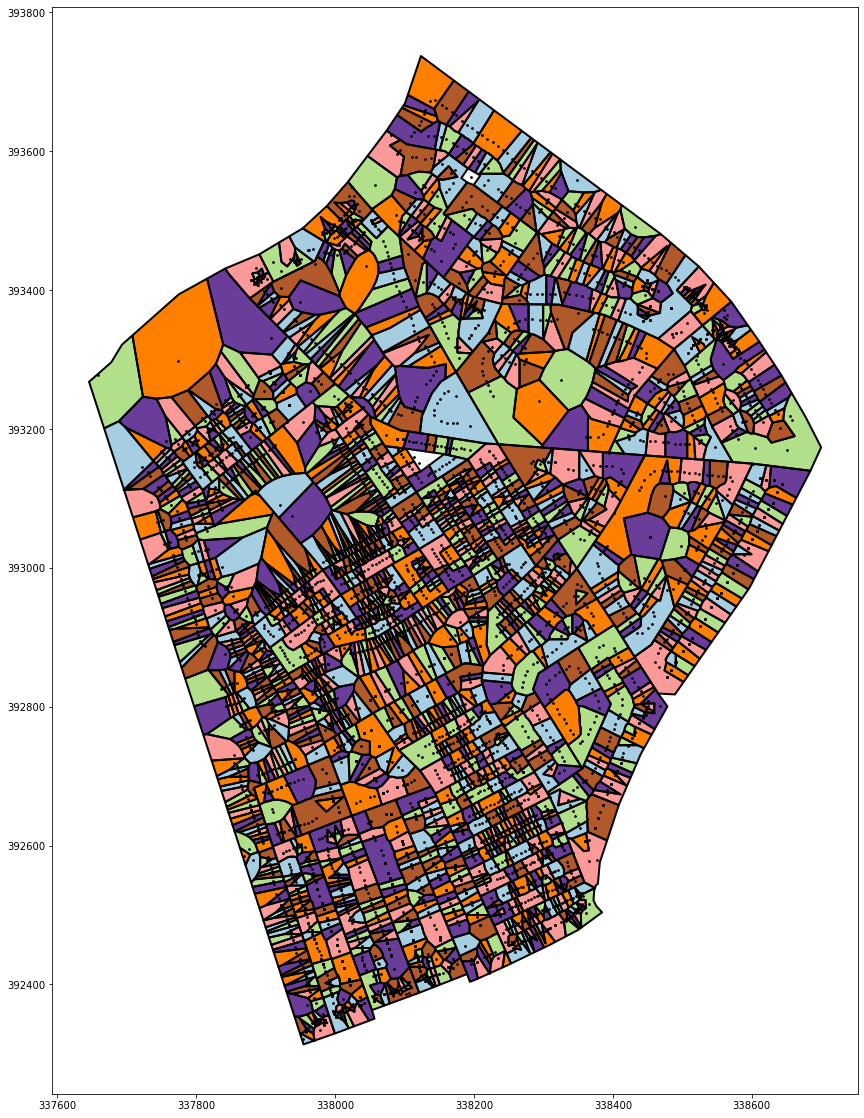

In [10]:
cmap='Paired'
fig, ax = plt.subplots(figsize=(20,20))
cells.plot('c', ax =ax, cmap=cmap)
cell_lines.plot(ax=ax,linewidth=2, color='k')
# n.roads.plot(color='k', ax=ax)
n.uprn.plot(color='k', ax=ax, markersize=3)

In [ ]:
# but this doesn't seem to be working
